In [1]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from math import factorial as fact
from IPython.display import display

In [2]:
def binomial_coefficient(n,k):
    return fact(n) / (fact(k) * fact(n-k))

def binomial_pmf(p,n,k):
    if n >= k:
        return binomial_coefficient(n,k) * p**k * (1-p)**(n-k)
    else: print('n is less than k')

In [3]:
def plot_binomial_pmf(ax, p, n, k):
    if n < k: 
        return
    else:
        ax.clear()
        vals = [binomial_pmf(p=p, n=n, k=ki) for ki in range(1, n)]
        x = [i for i in range(1, n)]
        ax.set_ylim([0,1])
        ax.plot(
            x,
            vals,
            ls = ' ',
            marker='o',
            ms = 5,
            mfc = 'k'
        )
        
        ax.plot (
            k,
            binomial_pmf(p=p, n=n, k=k),
            ls = ' ',
            marker = 'o',
            ms = 5,
            mec = 'r'
        )
        
        ax.set_title('k = {}'.format(binomial_pmf(p=p, n=n, k=k)))

In [4]:
n_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=250,
    step=1,
    continuous_update=True,
)

k_widget = widgets.IntSlider(
    value=1,
    min=0,
    max=n_widget.max,
    step=1,
    continuous_update=False,
)

p_widget = widgets.FloatSlider(
    value=.5,
    min=0,
    max=1,
    step=.05,
    continuous_update=False
)

<IPython.core.display.Javascript object>


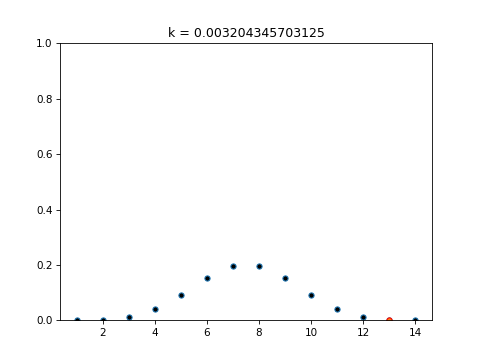

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='p', max=1.0, step=0.05), IntSlider(value=1, description='n', max=250, min=1), IntSlider(value=1, continuous_update=False, description='k', max=250), Output()), _dom_classes=('widget-interact',))

In [5]:
fig = plt.figure(num='int bin')
ax = fig.add_subplot(111)

interactive_bin = widgets.interact(plot_binomial_pmf, ax=widgets.fixed(ax), p=p_widget, n=n_widget, k=k_widget)